In [1]:
%matplotlib inline
import jplus
import os
import pickle
import elgtools as elg
import numpy as np
import matplotlib.pyplot as plt
import Read_Mocks as read
import MockJPLUS as mtools
import matplotlib.gridspec as gsc

Mockpath = '/home/CEFCA/aaorsi/work/JPLUS_Mock/'
namelc   = 'LightCone_SA_0_'

plt.rcParams['figure.figsize'] = 25, 25


In [2]:
# Loading SDSS data first

Load_coords = True
Load_ri     = True
Load_ugz    = True
Load_ri_err = True

if Load_coords:
    gal_sdss_coords  = jplus.datasets.fetch_custom_sdss(mag_type="none",overwrite=False,mag_limit=[16,21], extinction=False,
                                                          clean = True, nchunks = 10, spectroscopic=False, 
                                                    casjobs=True, object_name="photgalaxies",get_r=False, get_i=False,
                                                    runname='coords', get_coords=True) 
    id_obj = np.argsort(gal_sdss_coords['object_id'])
    gal_sdss_coords['object_id'] = gal_sdss_coords['object_id'][id_obj]
    gal_sdss_coords['coords'] = gal_sdss_coords['coords'][id_obj,:]
    print 'SDSS coordinates loaded'
    
if Load_ri:
    gal_sdss_r_i  = jplus.datasets.fetch_custom_sdss(mag_type="aperMags",overwrite=False,mag_limit=[16,21], extinction=False,
                                                          clean = True, nchunks = 10, spectroscopic=False, 
                                                    casjobs=True, object_name="photgalaxies",get_r=True, get_i=True,
                                                    runname='r_i', get_coords=False)  
    id_obj = np.argsort(gal_sdss_r_i['object_id'])
    gal_sdss_r_i['object_id'] = gal_sdss_r_i['object_id'][id_obj]
    gal_sdss_r_i['rSDSS'] = gal_sdss_r_i['rSDSS'][id_obj,:]
    gal_sdss_r_i['iSDSS'] = gal_sdss_r_i['iSDSS'][id_obj,:]
    
    print 'SDSS ri loaded'

if Load_ugz:
    gal_sdss_ugz  = jplus.datasets.fetch_custom_sdss(mag_type="aperMags",overwrite=False,mag_limit=[16,21], extinction=False,
                                                          clean = True, nchunks = 10, spectroscopic=False, 
                                                    casjobs=True, object_name="photgalaxies",get_u=True, get_g=True,get_z=True,
                                                    runname='ugz', get_coords=False)    
    print 'SDSS ugz loaded'

    id_obj = np.argsort(gal_sdss_ugz['object_id'])
    gal_sdss_ugz['object_id'] = gal_sdss_ugz['object_id'][id_obj]
    gal_sdss_ugz['uSDSS'] = gal_sdss_ugz['uSDSS'][id_obj,:]
    gal_sdss_ugz['gSDSS'] = gal_sdss_ugz['gSDSS'][id_obj,:]
    gal_sdss_ugz['zSDSS'] = gal_sdss_ugz['zSDSS'][id_obj,:]

if Load_ri_err:    
    gal_sdss_r_i_err = jplus.datasets.fetch_custom_sdss(mag_type="aperMags",overwrite=False,mag_limit=[16,21], extinction=False,
                                                          clean = True, nchunks = 10, spectroscopic=False, 
                                                    casjobs=True, object_name="photgalaxies",get_r_err=True, get_i_err=True,
                                                    runname='r_i_err', get_coords=False)
    print 'SDSS ri errors loaded'

    id_obj = np.argsort(gal_sdss_r_i_err['object_id'])
    gal_sdss_r_i_err['object_id'] = gal_sdss_r_i_err['object_id'][id_obj]
    gal_sdss_r_i_err['rSDSS'] = gal_sdss_r_i_err['rSDSS'][id_obj,:]
    gal_sdss_r_i_err['iSDSS'] = gal_sdss_r_i_err['iSDSS'][id_obj,:]
    
    
    
#gal_sdss_r_i_err = jplus.datasets.fetch_custom_sdss(mag_type="aperMags",overwrite=False,mag_limit=[16,21], extinction=False,
#                                                          clean = True, nchunks = 10, spectroscopic=False, 
#                                                    casjobs=True, object_name="photgalaxies",get_r_err=True, get_i_err=True,
#                                                    runname='r_i_err', get_coords=False)    


j-plus [INFO]: Fetching SDSS galaxies
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/coords_sdss_photgalaxies_none_magmax21.0.h5
j-plus [INFO]: Fetching SDSS galaxies
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/r_i_sdss_photgalaxies_aperMags_magmax21.0.h5


SDSS coordinates loaded


j-plus [INFO]: Fetching SDSS galaxies
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/ugz_sdss_photgalaxies_aperMags_magmax21.0.h5


SDSS ri loaded
SDSS ugz loaded


j-plus [INFO]: Fetching SDSS galaxies
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/r_i_err_sdss_photgalaxies_aperMags_magmax21.0.h5


SDSS ri errors loaded


In [3]:
# Load J-PLUS catalogue
LoadJPLUSCat = False # if True loads a ELG catalogue of JPLUS already built
mag_type = 'gpsfMags' # or wpsfMags


if LoadJPLUSCat:
    gal_elgs = pickle.load(open(fout))
else:
    mag_excess = "AND (m.MAG_APER_3_0[jplus::rSDSS]- m.MAG_APER_3_0[jplus::J0660]) > 0"
    gal_jplus0 = jplus.datasets.fetch_jplus_objects(mag_type=mag_type, overwrite=False, 
                                                 object_name="allELGs", nchunks=20, mag_limit=[16,24],
                                                extra_where_conds='',db='upad')


j-plus [INFO]: Fetching J-PLUS galaxies
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/jplus_allELGs_gpsfMags_upad_dual_magmax24.0.h5


In [4]:
# Further selection cuts of ELGs:

fnames = jplus.datasets.jplus_filter_names()

snr_limit = 5 # Minimum SNR for r, i and J0660


mc = ((gal_jplus0['mask_flags_rJAVA'] == 0) &
     (gal_jplus0['mask_flags_iJAVA'] == 0) &
     (gal_jplus0['mask_flags_J0660'] == 0) &
     (gal_jplus0['single_detect_J0660'] != 0) &
     (gal_jplus0['single_detect_iJAVA'] != 0) &
     (1./gal_jplus0['J0660'][:,1] > snr_limit)) 
    

jp0 = jplus.tools.select_object(gal_jplus0, mc)
    
        
print 'Original ELG selection contains %ld candidates' % len(gal_jplus0['tile_id'])
print 'After removing non-single detections and masked objects, %ld' % len(jp0['tile_id'])
frac = (len(jp0['tile_id']) + 0.0)/(len(gal_jplus0['tile_id'])+0.0)
print 'that is a fraction %f ' % frac


          

Original ELG selection contains 7675428 candidates
After removing non-single detections and masked objects, 5002422
that is a fraction 0.651745 


Cross-match of SDSS phot with J-PLUS ...
Cross-match in 5002422 galaxies,
SDSS: 38167240
nJPLUS: 5002422
xmatch catalogue contains 1234729 galaxies


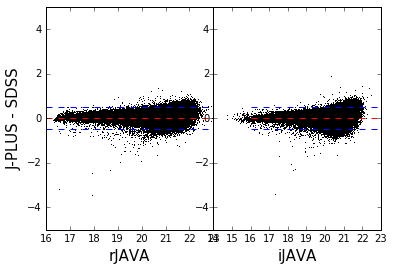

fraction of outliers in rJAVA - rSDSS: 0.003564
fraction of outliers in iJAVA - iSDSS: 0.006175
J-PLUS ELG catalogue loaded


In [5]:
# Cross-match with SDSS


elgdir   = os.getcwd()
fout = '%s/out/elgs.dat' % elgdir
z_oii = [0.73, 0.79]

UseSDSSPhot = True # Use SDSS BB photometry instead of J-PLUS?
AddedPlots = False
AddedPlots2 = True

if AddedPlots or AddedPlots2:
    plt.figure('PlotSDSSPhotometry')
    
    gs = gsc.GridSpec(1,2)
    gs.update(wspace=0.0, hspace=0.0)

    ijlim = -10
    rjlim = -10
    
    if UseSDSSPhot:
        
           
              
       
        
        print 'Cross-match of SDSS phot with J-PLUS ...'
        d,ind = jplus.tools.crossmatch_angular(jp0['coords'],gal_sdss_coords['coords'],max_distance=3e-4)
        m = ((d != np.inf))
        print 'Cross-match in %ld galaxies,\nSDSS: %ld\nnJPLUS: %ld' % (len(m), len(gal_sdss_coords['coords']), 
                                                                        len(jp0['coords']))
        
        jgal = jplus.tools.select_object(jp0, m)

        
        print 'xmatch catalogue contains %ld galaxies' % len(jgal['tile_id'])
        #jplus['in_sdss'] = m
        # Adding SDSS magnitudes
        jgal['rSDSS'] = gal_sdss_r_i['rSDSS'][ind[m]]
        jgal['iSDSS'] = gal_sdss_r_i['iSDSS'][ind[m]]
        jgal['uSDSS'] = gal_sdss_ugz['uSDSS'][ind[m]]
        jgal['gSDSS'] = gal_sdss_ugz['gSDSS'][ind[m]]
        jgal['zSDSS'] = gal_sdss_ugz['zSDSS'][ind[m]]
        
        jgal['rSDSS'][:,1] = gal_sdss_r_i_err['rSDSS'][ind[m],1]
        jgal['iSDSS'][:,1] = gal_sdss_r_i_err['iSDSS'][ind[m],1]
        
        # and their errors ...
#        jgal['rSDSS'][:,1] = gal_sdss_r_i_err['rSDSS'][:,1][ind[m]]
#        jgal['iSDSS'][:,1] = gal_sdss_r_i_err['iSDSS'][:,1][ind[m]]
        
        # Now removing those datasets to save memory
       
        
        nxmatch = len(jgal['rSDSS'][:,0])
        if AddedPlots2:
        
            delta_r = jgal['rJAVA'][:,0] - jgal['rSDSS'][:,0]
            delta_i = jgal['iJAVA'][:,0] - jgal['iSDSS'][:,0]
            
            outliers_r = np.where(np.fabs(delta_r) > .5)[0]
            outliers_i = np.where(np.fabs(delta_i) > .5)[0]
            
            plt.figure('SDSSvsJ-PLUS')
            ax = plt.subplot(gs[0,0])
            ax.plot(jgal['rJAVA'][:,0],delta_r ,',',color='black')
            ax.plot([16,23],[0,0],'--',color='red')
            ax.plot([16,23],[.5,.5],'--',color='blue')
            ax.plot([16,23],[-.5,-.5],'--',color='blue')
            ax.set_ylim([-5,5])
            ax.set_xlabel('rJAVA',fontsize=15)
            ax.set_ylabel('J-PLUS - SDSS',fontsize=15)
            ax = plt.subplot(gs[0,1])
            ax.plot(jgal['iJAVA'][:,0], delta_i, ',',color='black')
            ax.plot([16,23],[0,0],'--',color='red')
            ax.plot([16,23],[.5,.5],'--',color='blue')
            ax.plot([16,23],[-.5,-.5],'--',color='blue')
            ax.set_ylim([-5,5])
            ax.set_xlabel('iJAVA',fontsize=15)
            plt.show()
            
            print 'fraction of outliers in rJAVA - rSDSS: %f' % (len(outliers_r)/(0. + nxmatch))
            print 'fraction of outliers in iJAVA - iSDSS: %f' % (len(outliers_i)/(0. + nxmatch))
        ix = 0
        iy = 0



print 'J-PLUS ELG catalogue loaded'





In [6]:
clean_xmatch = (np.fabs(delta_r) < 2) & (np.fabs(delta_i) < 2) & (jgal['rSDSS'][:,0] < 21) & (jgal['rSDSS'][:,0] > 16) 
jplus_clean = jplus.tools.select_object(jgal, clean_xmatch)

print 'Number of clean xmatches: %ld\nOriginal catalogue has %ld' % (len(jplus_clean['tile_id']), len(jgal['tile_id']))



Number of clean xmatches: 797725
Original catalogue has 1234729


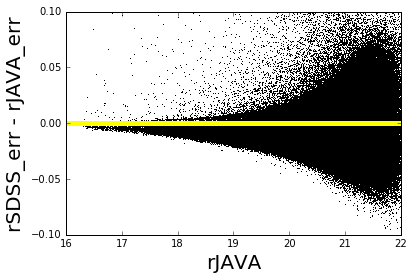

154.1079


In [7]:
plt.figure('Errors')

plt.plot(jgal['rJAVA'][:,0], jgal['rSDSS'][:,1] - jgal['rJAVA'][:,1], 'k,')
plt.xlabel('rJAVA',fontsize=20)
plt.ylabel('rSDSS_err - rJAVA_err',fontsize=20)

plt.xlim([16,22])
plt.ylim([-.1,.1])
plt.plot([0,30],[0,0],linewidth=5,color='yellow')

plt.show()

print np.max(gal_sdss_r_i_err['rSDSS'][:,1])




In [8]:
# Removing databases that are not used any further

del gal_jplus0
del jp0
del gal_sdss_r_i
del gal_sdss_r_i_err
del jgal0


NameError: name 'jgal0' is not defined

In [ ]:
# Loading Lightcone galaxies
nCone = 512
lcone = []

Mockpath = '/home/CEFCA/aaorsi/work/JPLUS_Mock/new/Lines/'
namelc   = 'LightCone_SA_0_'

print 'reading Lightcone...'
for i in range(nCone): #nCone):
    nameIn = '%s%s%d' % (Mockpath, namelc, i)
    ilc = read.readmock_chunk_PythonCut(nameIn, zspace = True)
    lcone.append(ilc[0])
    
dcone = np.concatenate(lcone)


In [9]:
print dcone.dtype

[('Type', '<i4'), ('Mvir', '<f4'), ('pos', '<f4', (3,)), ('vel', '<f4', (3,)), ('sfr', '<f4'), ('sfr_inst', '<f4'), ('BulgeMass', '<f4'), ('DiskMass', '<f4'), ('Time', '<f4'), ('redshift', '<f4'), ('BlackholeMass', '<f4'), ('MetalColdGas', '<f4'), ('ColdGas', '<f4'), ('MassWeightAge', '<f4'), ('ObsMagDust', '<f4', (12,))]


In [10]:




print 'done'



done


In [ ]:
# Loading Convolved spectra

import learn_elgs as learn
tfout = '/home/CEFCA/aaorsi/work/elg_jplus/trainspec.dat'
allspec, photo_spec = learn.LoadSample(tfout,overwrite=False, sdssxjplus=False)



In [ ]:


print dcone.dtype

f_j0660 = jplus.datasets.fetch_jplus_filter('J0660') # Filter transmission curve

w_oii = 3727.0 # OII rest-frame
z_oii = elg.zline(w_oii, f_j0660.wave, f_j0660.throughput)

w_ha = 6563.0
z_ha = elg.zline(w_ha, f_j0660.wave, f_j0660.throughput)

w_hb = 4861.0
z_hb = elg.zline(w_hb, f_j0660.wave, f_j0660.throughput)

w_oiii = 5007.0
z_oiii = elg.zline(w_oiii, f_j0660.wave, f_j0660.throughput)


print z_oii



In [ ]:

from scipy.interpolate import interp1d

# Shortcuts for magnitudes

r_mock     = mtools.app_mag(dcone, 'rSDSS')
g_mock     = mtools.app_mag(dcone, 'gSDSS')
i_mock     = mtools.app_mag(dcone, 'iSDSS')
z_mock     = mtools.app_mag(dcone, 'zSDSS')
j0660_mock     = mtools.app_mag(dcone, 'J0660')
j0861_mock     = mtools.app_mag(dcone, 'J0861')

g_jplus = jplus_clean['gJAVA'][:,0]
r_jplus = jplus_clean['rSDSS'][:,0]
z_jplus = jplus_clean['zJAVA'][:,0]
i_jplus = jplus_clean['iSDSS'][:,0]
j0660_jplus = jplus_clean['J0660'][:,0]
j0861_jplus = jplus_clean['J0861'][:,0]


j0660_spec = photo_spec['J0660'][:,0]
j0861_spec = photo_spec['J0861'][:,0]
r_spec = photo_spec['rJAVA'][:,0]
i_spec = photo_spec['iJAVA'][:,0]
g_spec = photo_spec['gJAVA'][:,0]  # gJAVA, zJAVA are not fully sampled by VIMOS spectra (VVDS, VIPERS)
z_spec = photo_spec['zJAVA'][:,0]  # gJAVA, zJAVA are not fully sampled by VIMOS spectra (VVDS, VIPERS)




# Computing 3FM on each dataset
print 'Computing 3FM on mocks and J-PLUS ...'

dm_mocks = mtools.tfm(dcone,broad_noline='iSDSS')
dm_jplus = mtools.gen_3fm(jplus_clean['J0660'][:,0], jplus_clean['rSDSS'][:,0], 
                          jplus_clean['iSDSS'][:,0],Broad_NoLineName='iSDSS')

dm_java = mtools.gen_3fm(jplus_clean['J0660'][:,0], jplus_clean['rJAVA'][:,0], 
                          jplus_clean['iJAVA'][:,0],Broad_NoLineName='iSDSS')


dm_spec = mtools.gen_3fm(photo_spec['J0660'][:,0], photo_spec['rJAVA'][:,0], 
                          photo_spec['iJAVA'][:,0],Broad_NoLineName='iSDSS')


print 'done'

mock_rlim = 21.3


cond_mocks = (dm_mocks > 0.4) & (r_mock > 20)
cond_jplus = (dm_jplus > 0.4) & (jplus_clean['rSDSS'][:,0] > 20) & (~np.isnan(dm_jplus)) & (jplus_clean['rSDSS'][:,0] < mock_rlim)
cond_spec  = (dm_spec > 0.4) & (r_spec > 20)


#m_ha = cond_mocks & (dcone['redshift'] > z_ha[0]) & (dcone['redshift'] < z_ha[1])
#m_hb = cond_mocks & (dcone['redshift'] > z_hb[0]) & (dcone['redshift'] < z_hb[1])
#m_oii = cond_mocks & (dcone['redshift'] > z_oii[0]) & (dcone['redshift'] < z_oii[1])
#m_oiii = cond_mocks & (dcone['redshift'] > z_oiii[0]) & (dcone['redshift'] < z_oiii[1])


plt.figure(111)
nbins = 50
r_arr = np.linspace(16,24,nbins)
rbin = r_arr[1] - r_arr[0]
pp = np.zeros(nbins)
pp2 = np.zeros(nbins)
plt.plot(jplus_clean['rSDSS'][:,0],dm_jplus,',', color='gray')

rj = jplus_clean['rSDSS'][:,0]
for i in range(nbins):
    sel = np.where((rj > r_arr[i] - rbin/2. ) & (rj < r_arr[i] + rbin/2.))[0]
    dm_r = dm_jplus[sel]
    
    if len(dm_r) > 0:
        pp[i] = np.percentile(dm_jplus[sel],84.)
        pp2[i] = np.percentile(dm_java[sel],84)
    
nzero = pp > 0    
plt.plot(r_arr[nzero],pp[nzero],color='green',linewidth=5)
plt.plot(r_arr[nzero],pp2[nzero],color='yellow',linewidth=5)
plt.ylim([-1,1])
plt.xlabel('rSDSS',fontsize=20)
plt.ylabel(r'$\Delta m$',fontsize=20)

pline = interp1d(r_arr[nzero],pp[nzero])

print np.max(jplus_clean['rSDSS'][:,0])
print np.min(jplus_clean['rSDSS'][:,0])
print r_arr[nzero]
jplus_clean['dm'] = dm_jplus 
jplus_clean['dmsigma']  = jplus_clean['dm']/(pline(jplus_clean['rSDSS'][:,0]))
mask = jplus_clean['dmsigma'] > 2.0

elgs = jplus.tools.select_object(jplus_clean, mask)

plt.plot(elgs['rSDSS'][:,0],elgs['dm'],'r.')

plt.xlim([17,22.5])
plt.ylim([-1,1])





In [ ]:
# Computing errors in the 3FM

reload(mtools)


# Error from propagation:
err_dm_jplus = mtools.gen_3fm_err(jplus_clean['J0660'][:,0], jplus_clean['J0660'][:,1], jplus_clean['rSDSS'][:,0], jplus_clean['rSDSS'][:,1], 
                          jplus_clean['iSDSS'][:,0], jplus_clean['iSDSS'][:,1],Broad_NoLineName='iSDSS')


# Error from Monte-Carlo:



Nsamp = 30
Niter = 10


shuff_ind = np.random.permutation(range(len(jplus_clean['J0660'][:,0])))[0:Nsamp]
err_MC = np.zeros(Nsamp)
print 'running MC ...'
for i in range(Nsamp):
    idd = shuff_ind[i]
    _j0660 = jplus_clean['J0660'][idd,:]
    _r     = jplus_clean['rSDSS'][idd,:]
    _i     = jplus_clean['iSDSS'][idd,:]
    
    err_MC[i] = np.std([mtools.gen_3fm(_j0660[0]+ np.random.normal(0,_j0660[1]), _r[0] + np.random.normal(0,_r[1]), 
                          _i[0] + np.random.normal(0,_i[1]),Broad_NoLineName='iSDSS') for j in range(Niter)])
    
        
    if i%10 == 0:
        print '%.1f percent done' % (float(i)/Nsamp*100)
        
print 'done!'
plt.figure('Errors in delta-m')

#plt.plot(jplus_clean['rSDSS'][shuff_ind,0], err_dm_jplus[shuff_ind],'.', color='black',label='Error propagation')
plt.plot(jplus_clean['rSDSS'][shuff_ind,0], err_MC,'.', color='red',label='STD of MC runs')
plt.legend(loc='upper left',fontsize=20)

print err_dm_jplus[shuff_ind]
print err_MC
plt.show()
        






In [64]:
reload(mtools)

err_dm_jplus = mtools.gen_3fm_err(jplus_clean['J0660'][23,0], jplus_clean['J0660'][23,1], jplus_clean['rSDSS'][23,0], jplus_clean['rSDSS'][23,1], 
                          jplus_clean['iSDSS'][23,0], jplus_clean['iSDSS'][23,1],Broad_NoLineName='iSDSS')


print err_dm_jplus


6.06947995556e-19
5.57764798626e-19
1.77437185916e-18
2.83331883119e-16
d_a  -1090.48913958
Err_cont :0.000000
ErrM: 0.000000 ErrN: 0.000000
Err mags: 1.004849 1.374521
1.00714204981


In [60]:
print 1222%10


2


In [ ]:


plt.figure(111)
nbins = 50
r_arr = np.linspace(16,24,nbins)
rbin = r_arr[1] - r_arr[0]
pp = np.zeros(nbins)
plt.plot(jplus_clean['rSDSS'][:,0],dm_jplus,',', color='gray')

rj = jplus_clean['rJAVA'][:,0]
for i in range(nbins):
    sel = np.where((rj > r_arr[i] - rbin/2. ) & (rj < r_arr[i] + rbin/2.))[0]
    dm_r = dm_jplus[sel]
    if len(dm_r > 10):
        pp[i] = np.percentile(dm_r,99.)
    
nzero = pp > 0    
plt.plot(r_arr[nzero],pp[nzero],color='green',linewidth=5)
plt.ylim([-2,2])
plt.xlabel('rJAVA',fontsize=20)
plt.ylabel(r'$\Delta m$',fontsize=20)

pline = interp1d(r_arr[nzero],pp[nzero])

print np.max(jplus_clean['rSDSS'][:,0])
print np.min(jplus_clean['rSDSS'][:,0])
jplus_clean['dm'] = dm_jplus 
jplus_clean['dmsigma']  = jplus_clean['dm']/(pline(jplus_clean['rSDSS'][:,0]))
mask = jplus_clean['dmsigma'] > 1.0

elgs = jplus.tools.select_object(jplus_clean, mask)

plt.plot(elgs['rSDSS'][:,0],elgs['dm'],'r.')

plt.xlim([17,22.5])
plt.ylim([-1,1])


In [ ]:
# Find Outliers with huge flux excess in J0660

bright = np.where((jplus_clean['dmsigma'] > 1.0) & (jplus_clean['rSDSS'][:,0] < 19))[0]
print bright

for b in bright:
    print b
    gal = jplus_clean
    print "http://upad.cefca.es/catalogues/jplus-v02/object_query.html?image=%s&number=%s"%(str(np.int(gal['tile_id'][b])),str(np.int(gal['object_id'][b])))
    #print gal['coords'][b]
    #print gal[]
    ##jplus.tools.inspect_object(jplus.tools.select_object(gal_elgs,b))



In [ ]:
# Cross-match with ALHAMBRA catalogue

print 'Reading and performing cross-match with ALHAMBRA objects'
import deepdish as dd
AlhambraFile = '/home/CEFCA/aaorsi/work/alhambra/Alhambra.hdf5'

alh = dd.io.load(AlhambraFile)
print alh.keys()


alh_d,alh_ind = jplus.tools.crossmatch_angular(jplus_clean['coords'],alh['coords'],max_distance=3e-4)
alh_m = ((alh_d != np.inf))

jp_alh = jplus.tools.select_object(jplus_clean, alh_m)


print 'Cross match between Alhambra and J-PLUS results in %ld objects' % len(jp_alh['tile_id'])

# Cross match with ELG selection.... 
alh_d2, alh_ind2 = jplus.tools.crossmatch_angular(elgs['coords'],alh['coords'], max_distance=3e-4)
mask = ((alh_d2 != np.inf))

elg_xalha = jplus.tools.select_object(elgs, mask)
alha_xelg = jplus.tools.select_object(alh, alh_ind2[mask])



elg_xalha['zphoto'] = alha_xelg['zphoto']

# z_elgs_alh = zph_alh[alh_ind2[alh_m2]]
# dm_alh = dm_jplus[alh_m2]
# jp_alh2['dm'] = dm_alh
#jp_alh2['z'] = z_elgs_alh

# alh_cstar = np.asarray(alh['cstar'])
# jp_alh2['alh_cstar'] = alh_cstar[alh_ind2[alh_m2]]

print 'Cross match between Alhambra and J-PLUS ELGs results in %ld objects' % len(elg_xalha['tile_id'])
#alh.keys()


In [ ]:

for b in range(len(elg_xalha['tile_id'])):
    print "http://upad.cefca.es/catalogues/jplus-v02/object_query.html?image=%s&number=%s"%(str(np.int(elg_xalha['tile_id'][b])),str(np.int(elg_xalha['object_id'][b])))
    print "Redshift in Alhambra {0}".format(elg_xalha['zphoto'][b])
    print "CSTAR in Alhambra {0}, in JPLUS {1}".format(alha_xelg['cstar'][b], elg_xalha['cstar'][b])
    print elg_xalha['coords']
    
plt.figure()
plt.hist(elg_xalha['zphoto'], bins=100)
plt.show()

In [ ]:
jp_alh2['in_sdss']
import strings 
alhambra_flist = [u'F365W',
 u'F396W',
 u'F427W',
 u'F458W',
 u'F489W',
 u'F520W',
 u'F551W',
 u'F582W',
 u'F613W',
 u'F644W',
 u'F675W',
 u'F706W',
 u'F737W',
 u'F768W',
 u'F799W',
 u'F814W',
 u'F830W',
 u'F861W',
 u'F892W',
 u'F923W',
 u'F954W']

nfilt = len(alhambra_flist)

w_alhambra = np.zeros(nfilt)
for i in range(nfilt):
    w_alhambra[i] = str.



In [ ]:

plt.figure(666)
plt.hist(z_jp_alh,bins=100)
plt.xlabel('redshift',fontsize=20)
plt.title('redshift distribution of Alhambra galaxies in J-PLUS',fontsize=25)


cmap = plt.cm.Reds(np.linspace(0.25,0.99,len(z_jp_alh)))

plt.figure(667)
plt.scatter(jp_alh['rJAVA'][:,0], f814_alh[alh_ind[alh_m]], c=z_jp_alh,cmap=plt.cm.Reds)
plt.colorbar()
plt.xlabel('rJAVA', fontsize=20)
plt.ylabel('F814W',fontsize=20)


sel = (jp_alh2['alh_cstar'] < 0.3) & (dm_alh > 0.4)

#######

plt.figure(668)
plt.hist(z_elgs_alh[sel],bins=100)
plt.xlabel('redshift',fontsize=20)
plt.title('redshift distribution of Alhambra galaxies in J-PLUS ELG candidates',fontsize=25)


plt.figure(669)
plt.plot(dm_alh,z_elgs_alh,'o')
plt.xlabel(r'$\Delta m$',fontsize=20)
plt.ylabel(r'redshift',fontsize=20)


ha_jp = (z_elgs_alh >= z_ha[0]) & (z_elgs_alh <= z_ha[1])
hb_jp = (z_elgs_alh >= z_hb[0]) & (z_elgs_alh <= z_hb[1])
oiii_jp = (z_elgs_alh >= z_oiii[0]) & (z_elgs_alh <= z_oiii[1])
oii_jp = (z_elgs_alh >= z_oii[0]) & (z_elgs_alh <= z_oii[1])

print z_ha
print ha_jp
print z_oii
print oii_jp
print z_oiii
print oiii_jp
print z_elgs_alh

plt.figure(670)

plt.plot(g_jplus[alh_m2] - r_jplus[alh_m2], r_jplus[alh_m2]-z_jplus[alh_m2],'.',color='darkgray')

plt.plot(jp_alh2['gJAVA'][ha_jp,0] - jp_alh2['rJAVA'][ha_jp,0], 
         jp_alh2['rJAVA'][ha_jp,0]-jp_alh2['zJAVA'][ha_jp,0],
         'o',color='red',label=r'$H\alpha\lambda 6562')

plt.plot(jp_alh2['gJAVA'][oii_jp,0] - jp_alh2['rJAVA'][oii_jp,0], 
         jp_alh2['rJAVA'][oii_jp,0]-jp_alh2['zJAVA'][oii_jp,0],
         'o',color='blue',label=r'$[OII]\lambda 3727')

plt.plot(jp_alh2['gJAVA'][hb_jp,0] - jp_alh2['rJAVA'][hb_jp,0], 
         jp_alh2['rJAVA'][hb_jp,0]-jp_alh2['zJAVA'][hb_jp,0],
         'o',color='green',label=r'$H\beta\lambda 4861')


plt.plot(jp_alh2['gJAVA'][oiii_jp,0] - jp_alh2['rJAVA'][oiii_jp,0], 
         jp_alh2['rJAVA'][oiii_jp,0]-jp_alh2['zJAVA'][oiii_jp,0],
         'o',color='magenta',label=r'$[OIII] \lambda 5007')


plt.xlabel(r'$g - r$',fontsize=20)
plt.ylabel(r'$r - z$',fontsize=20)
plt.xlim([0,3])
plt.ylim([-1,3])

plt.legend()



In [ ]:
# Find Outliers in cross match with ALHAMBRA

#bright = np.where((z_jp_alh > 2) & (jp_alh['rJAVA'][:,0] < 20))[0]
bright = np.arange(len(jp_alh2['tile_id']))
print bright

for b in bright:
    gal = jp_alh2
    print "http://upad.cefca.es/catalogues/jplus-v02/object_query.html?image=%s&number=%s"%(str(np.int(gal['tile_id'][b])),str(np.int(gal['object_id'][b])))
    print gal['coords'][b]
    print gal['dm'][b]
    print gal['z_alh'][b]
    print gal['alh_cstar'][b]
    print gal['in_sdss'][b]
    
    #jplus.tools.inspect_object(jplus.tools.select_object(gal,b))


In [ ]:
# Compare Alhambra and J-PLUS photometry





In [ ]:
print photo_spec.keys()

plt.figure(4)

dm_bins = np.arange(0.4, 3., 0.05)

plt.hist(dm_spec[cond_spec],bins=dm_bins, label='spectroscopy', normed=True, alpha=0.75)
plt.hist(dm_mocks[cond_mocks],dm_bins,normed=True,facecolor='green',label='Mocks', alpha=0.75)
plt.hist(dm_jplus[cond_jplus],dm_bins,normed=True,facecolor='red',alpha=0.35,label='J-PLUS', log=True)
plt.xlim([0,3])
plt.ylim([1e-2, 2e1])
plt.xlabel(r'$\Delta m$', fontsize=20)
plt.legend(loc='upper right', fontsize=20)


plt.figure(5)
plt.plot(r_jplus[cond_jplus]-j0660_jplus[cond_jplus],i_jplus[cond_jplus]-j0660_jplus[cond_jplus],',',color='green', label='J-PLUS')
plt.plot(r_mock[cond_mocks]-j0660_mock[cond_mocks],i_mock[cond_mocks]-j0660_mock[cond_mocks],'.',color='blue', label='Lightcone')
plt.plot(r_spec[cond_spec]-j0660_spec[cond_spec],i_spec[cond_spec]-j0660_spec[cond_spec],'.',color='magenta',label='Spectra')

plt.xlabel('r-j0660',fontsize=20)
plt.ylabel('i-j0660',fontsize=20)
plt.legend(fontsize=20)


plt.figure(6)

plt.plot(r_jplus[cond_jplus],i_jplus[cond_jplus],',',color='green')
plt.plot(r_mock[cond_mocks],i_mock[cond_mocks],'.',color='blue')
plt.plot(r_spec[cond_spec],i_spec[cond_spec],'.',color='magenta')

plt.figure(8)

plt.plot(r_jplus[cond_jplus]-i_jplus[cond_jplus],j0660_jplus[cond_jplus]-j0861_jplus[cond_jplus],',',color='green', label='J-PLUS')
plt.plot(r_mock[cond_mocks]-i_mock[cond_mocks],j0660_mock[cond_mocks]-j0861_mock[cond_mocks],'.',color='blue', label='Mock')
plt.plot(r_spec[cond_spec]-i_spec[cond_spec],j0660_spec[cond_spec]-j0861_spec[cond_spec],'.',color='magenta',label='Spectra')

#plt.plot(r_mock[m_ha]-i_mock[m_ha],j0660_mock[m_ha]-j0861_mock[m_ha],'o',color='black', label=r'$H\alpha~{\rm Mock}$')
#plt.plot(r_mock[m_hb]-i_mock[m_hb],j0660_mock[m_hb]-j0861_mock[m_hb],'o',color='darkgray', label=r'$H\beta~{\rm Mock}$')
#plt.plot(r_mock[m_oii]-i_mock[m_oii],j0660_mock[m_oii]-j0861_mock[m_oii],'o',color='lightgray', label=r'[O \textsc{ii}] Mock')
plt.xlabel('r - i',fontsize=20)
plt.ylabel('J0660 - J0861',fontsize=20)
plt.xlim([-0.5,2])
plt.ylim([-3,2])
plt.legend()

plt.figure(9)

plt.plot(r_jplus[cond_jplus],j0660_jplus[cond_jplus]-j0861_jplus[cond_jplus],',',color='green', label='J-PLUS')
plt.plot(r_mock[cond_mocks],j0660_mock[cond_mocks]-j0861_mock[cond_mocks],'.',color='blue', label='Mock')
plt.plot(r_spec[cond_spec],j0660_spec[cond_spec]-j0861_spec[cond_spec],'.',color='magenta',label='Spectra')
plt.xlabel('r ',fontsize=20)
plt.ylabel('J0660 - J0861',fontsize=20)
plt.xlim([20,22])
plt.ylim([-3,2])
plt.legend()



In [ ]:
len(allspec)

In [ ]:
# Test on EDR



UseSDSSPhot = True # Use SDSS BB photometry instead of J-PLUS?
AddedPlots = True


plt.figure('PlotSDSSPhotometry_EDAM')
import matplotlib.gridspec as gsc
gs = gsc.GridSpec(3,2)
gs.update(wspace=0.0, hspace=0.0)

mag_excess = "AND (m.MAG_APER_3_0[jplus::rSDSS]- m.MAG_APER_3_0[jplus::J0660]) > 0"
gal_jplus = jplus.datasets.fetch_jplus_stars(mag_type="aper6Mags", overwrite=False, 
                                                 mag_limit=[16,21],
                                                db='edr')
    
if UseSDSSPhot:
    gal_sdss  = jplus.datasets.fetch_sdss_stars(mag_type="modelMags",overwrite=False,mag_limit=[16,24],nchunks=10)
    print 'Replacing J-PUS BBs with SDSS BBs...'
    d2,ind2 = jplus.tools.crossmatch_angular(gal_jplus['coords'],gal_sdss['coords'],max_distance=3e-4)
    m2 = ((d2 != np.inf))
   
#    plt.figure(99)
#    plt.plot(gal_jplus['rJAVA'][m2,0] - gal_jplus['iJAVA'][m2,0],
#             gal_sdss['rSDSS'][ind2[m2],0] - gal_sdss['iSDSS'][ind2[m2],0],',')
#    plt.xlim([-2,2])
#    plt.ylim([-2,2])
#    plt.plot([-2,2],[-2,2],'--')
#    plt.show()

    ix = 0
    iy = 0
    for f_jplus, f_sdss in zip(jplus.datasets.jplus_filter_names(only_bb = True), jplus.datasets.sdss_filter_names()):
        if AddedPlots:
            ax = plt.subplot(gs[ix,iy]) 
            print f_jplus, f_sdss
            ax.plot(gal_jplus[f_jplus][m2,0][0::5], 
                gal_sdss[f_sdss][ind2[m2],0][0::5]-gal_jplus[f_jplus][m2,0][0::5],'.',
                color='black')
            ax.text(0.15,0.75,f_jplus,transform=ax.transAxes,fontsize=18)
            ax.set_xlim([16.1,23])
            ax.set_ylim([-.5,.5])
            ax.plot([16,23],[0,0],'--',color='black')
            if iy >0:
                ax.set_yticklabels([])
                
            ix += 1                
            if ix == 3:
                iy += 1
                ix = 0
                    
            plt.draw()    
      
        gal_jplus[f_jplus][m2,:] = gal_sdss[f_sdss][ind2[m2],:]
        
    print 'Done replacing filters'


